<a href="https://colab.research.google.com/github/hyojunyee/kita_2404/blob/main/m5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/Task/Task_0729.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task1_0729. Target Column의 분포를 확인하고 다음 사항을 수행하세요.

- Target을 로그변환 및 X 변수들을 표준화한 후 모델 학습 및 평가
- 이상치 여부를 파악한 후 처리하고 모델 학습 및 평가
- 이상치 처리 전후에 대한 모델 평가 결과 비교 설명

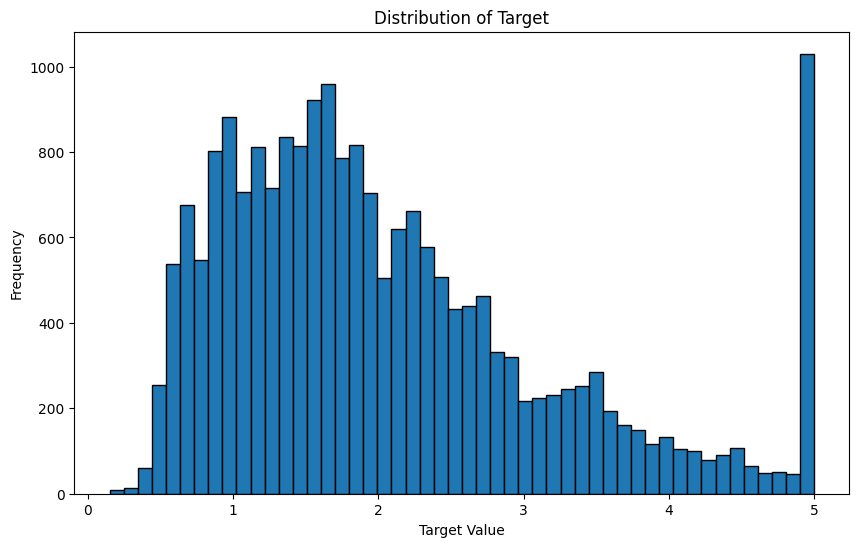

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import seaborn as sns

# 켈리포니아 주택 데이터셋 불러오기
housing = fetch_california_housing()
X = housing.data
y = housing.target

# 데이터 프레임 생성
df = pd.DataFrame(X, columns=housing.feature_names)
df['Target'] = y

# Target 분포 확인
plt.figure(figsize=(10, 6))
plt.hist(df['Target'], bins=50, edgecolor='k')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.title('Distribution of Target')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# 로그 변환
df['Log_Target'] = np.log1p(df['Target'])

# X 변수 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['Target', 'Log_Target']))
y_log = df['Log_Target']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Log-Transformed Target Evaluation:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

Log-Transformed Target Evaluation:
Mean Squared Error: 0.0503
Mean Absolute Error: 0.1679
R^2 Score: 0.6006


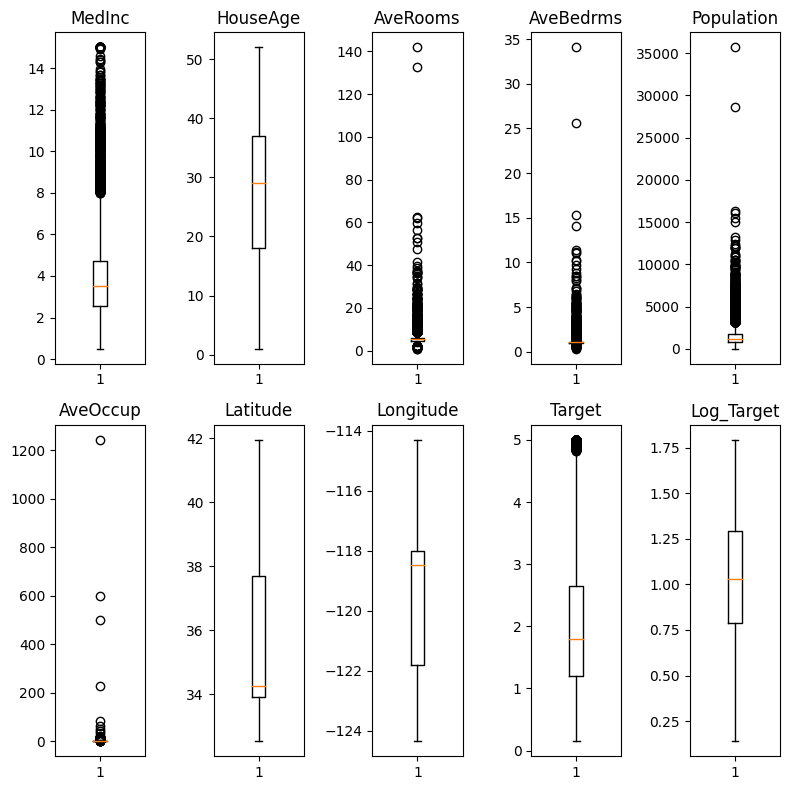

In [ ]:
# 박스플롯 그리기
plt.figure(figsize=(8, 8))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 5, i)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
# IQR 방법을 사용한 이상치 처리 함수 정의
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 각 열에 대해 이상치 제거
for col in df.columns[:-2]:  # 'Target'과 'Log_Target' 제외
    df = remove_outliers(df, col)

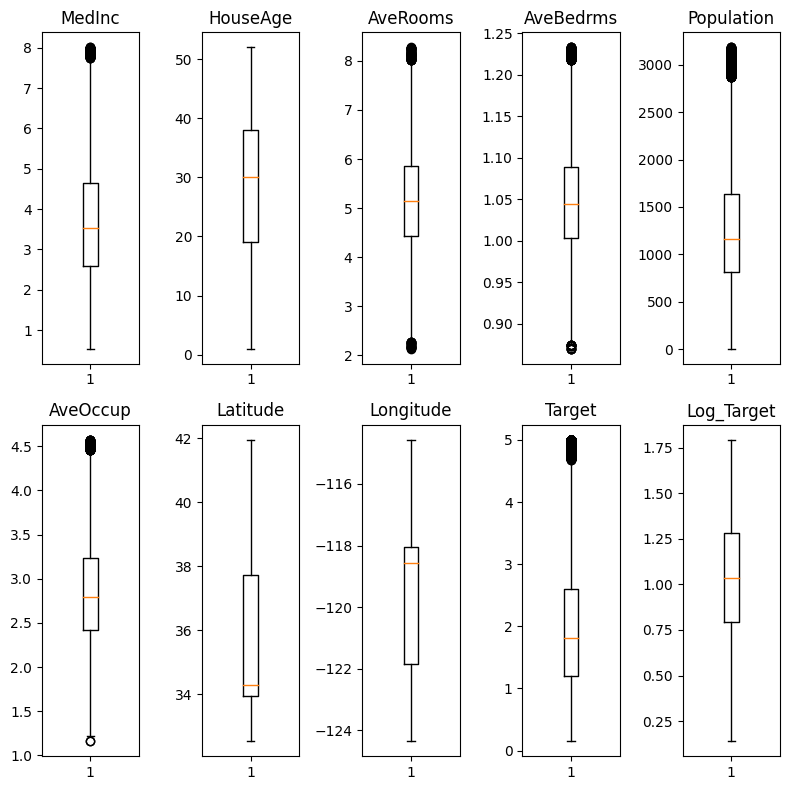

In [ ]:
# 박스플롯 그리기
plt.figure(figsize=(8, 8))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 5, i)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# 로그 변환
df['Log_Target'] = np.log1p(df['Target'])

# X 변수 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['Target', 'Log_Target']))
y_log = df['Log_Target']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Log-Transformed Target Evaluation:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

Log-Transformed Target Evaluation:
Mean Squared Error: 0.0359
Mean Absolute Error: 0.1432
R^2 Score: 0.6963


In [ ]:
# 표준화 다시 수행
X_scaled = scaler.fit_transform(df.drop(columns=['Target', 'Log_Target']))
y_log = df['Log_Target']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
mse_outliers_removed = mean_squared_error(y_test, y_pred)
mae_outliers_removed = mean_absolute_error(y_test, y_pred)
r2_outliers_removed = r2_score(y_test, y_pred)

print(f"Outliers Removed Evaluation:")
print(f"Mean Squared Error: {mse_outliers_removed:.4f}")
print(f"Mean Absolute Error: {mae_outliers_removed:.4f}")
print(f"R^2 Score: {r2_outliers_removed:.4f}")

Outliers Removed Evaluation:
Mean Squared Error: 0.0359
Mean Absolute Error: 0.1432
R^2 Score: 0.6963


- Mean Squared Error (MSE):
    - MSE는 로그 변환 후보다 이상치 제거 후에 더 낮음. 이상치 제거가 모델의 예측 오차를 줄이는 데 더 효과적이었음을 나타냄

- Mean Absolute Error (MAE):
    - MAE도 이상치 제거 후에 더 낮음. 이는 모델이 예측하는 값들이 실제 값에 더 가까운 것을 의미

- R² Score:
    - R² 스코어는 이상치 제거 후에 더 높음. 이는 모델이 로그 변환 후보다 이상치 제거 후에 데이터를 더 잘 설명하고 있음을 나타냄

- 로그 변환의 효과:
    - 로그 변환은 종속 변수의 분포를 정규화하여 모델이 더 안정적인 예측을 할 수 있게 도와줌. 하지만 로그 변환만으로는 이상치를 충분히 처리할 수 없을 수 있음.

- 이상치 제거의 효과:
    - 이상치 제거는 데이터의 극단값을 제거하여 모델이 일반적인 패턴을 더 잘 학습하게 함. 결과적으로 이 데이터 셋에서는, MSE와 MAE가 감소하고 R² 스코어가 증가하는 긍정적인 영향을 미침

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# X 변수 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['Target', 'Log_Target']))
y_log = df['Log_Target']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
mse_combined = mean_squared_error(y_test, y_pred)
mae_combined = mean_absolute_error(y_test, y_pred)
r2_combined = r2_score(y_test, y_pred)

print(f"Combined Log-Transformation and Outliers Removed Evaluation:")
print(f"Mean Squared Error: {mse_combined:.4f}")
print(f"Mean Absolute Error: {mae_combined:.4f}")
print(f"R^2 Score: {r2_combined:.4f}")

Combined Log-Transformation and Outliers Removed Evaluation:
Mean Squared Error: 0.0359
Mean Absolute Error: 0.1432
R^2 Score: 0.6963


Task2_0729. alphas = [0, 0.1, 1, 10, 100]와 같이 주어졌을 때 다음을 수행하세요.
- alpha값에 따른 평균 RMSE
- alpha값에 따른 회귀계수의 변화

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 보스턴 데이터셋 불러오기
boston = fetch_openml(name="Boston", version=1, parser='auto')

# 데이터셋을 데이터프레임으로 변환
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# 필요한 feature이면 dtype 변환
for col in boston_df.columns:
    if boston_df[col].dtype.name == 'category':
        # 'category 타입을 먼저 수치형으로 변환 -> 범주형 데이터는 모델에 직접 사용할 수 없기 때문에 수치형으로 변환
        boston_df[col] = boston_df[col].cat.codes
        # 데이터 타입을 float으로 변경
        boston_df[col] = boston_df[col].astype(float)

In [ ]:
# 릿지 회귀에 사용할 데이터와 타겟 설정
X_data = boston_df.drop(['PRICE'], axis=1)
y_target = boston_df['PRICE']

# 알파 값 리스트
alphas = [0, 0.1, 1, 10, 100]

# 각 alpha에 대해 회귀계수와 평균 RMSE를 저장할 리스트
coef_dict = {}
rmse_dict = {}

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_data, y_target)

    # 회귀계수 저장
    coef_dict[a] = ridge.coef_

    # 교차 검증을 통한 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    rmse_dict[a] = avg_rmse

    print(f'Alpha 값 {a}의 5folds 평균 RMSE: {avg_rmse:.3f}\n')

Alpha 값 0의 평균 RMSE: 5.717
Alpha 값 0.1의 평균 RMSE: 5.700
Alpha 값 1의 평균 RMSE: 5.641
Alpha 값 10의 평균 RMSE: 5.568
Alpha 값 100의 평균 RMSE: 5.499


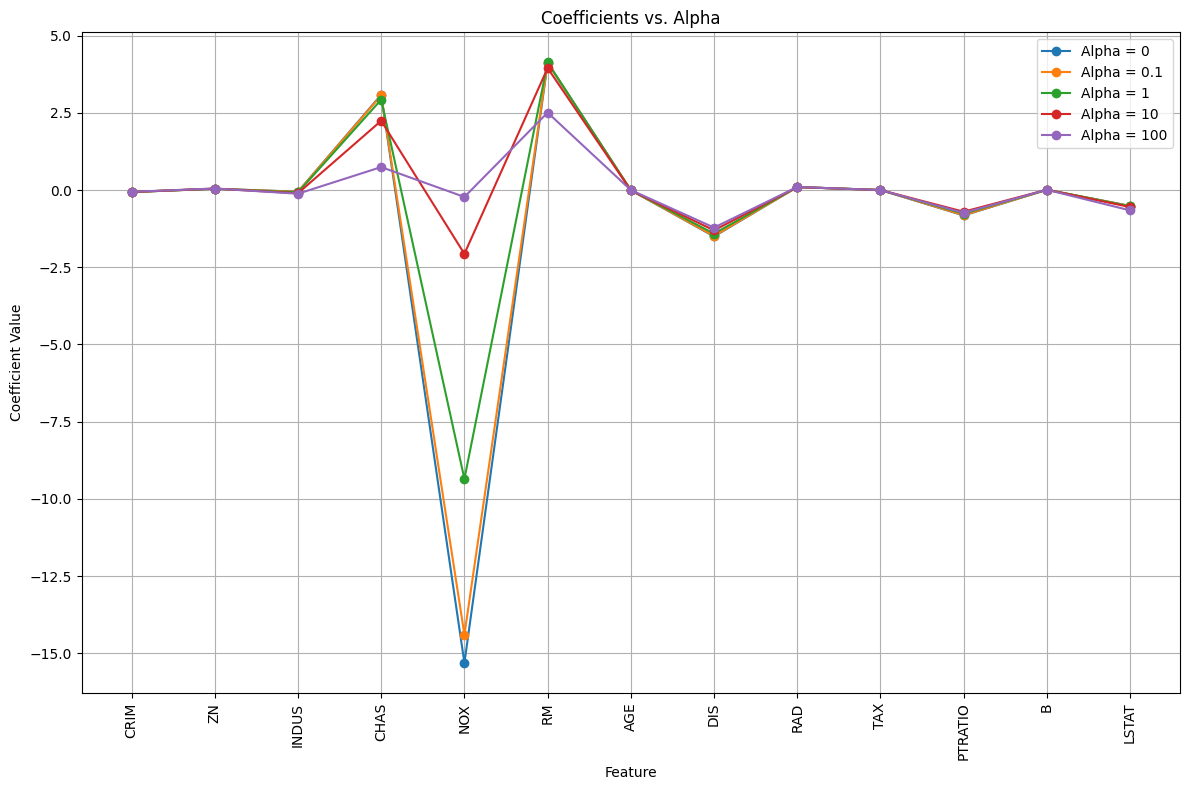

In [ ]:
# 회귀계수 시각화
plt.figure(figsize=(12, 8))
for a, coef in coef_dict.items():
    plt.plot(X_data.columns, coef, marker='o', label=f'Alpha = {a}')

plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs. Alpha')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()